# Imports

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from random import randint,random

# Importar dados

## Dados puros

In [21]:
dados = pd.read_csv('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Dados/Dados.csv')
dados.head()

,Área S0,Modulus (Automatic Young's),Load at Fy ( 0.2 %) - LE,Tensao em Fy ( 0.2 %) - LE,Deformacao em Fy ( 0.2 %) - LE,Forca Max,Tensao na Forca Max - LR,Deformacao na Forca Max - LR,Forca na Forca na Quebra - LQ,Deformacao na Forca na Quebra - LQ,Plano,Plano ID
0,21.806600,1378,0.405,18.572359,1.536,0.864,39.621032,22.976,0.733,40.176,deitado,0
1,22.223778,1383,0.397,17.863750,1.521,0.864,38.877279,23.239,0.675,42.073,deitado,0
2,21.242267,1362,0.392,18.453775,1.585,0.836,39.355499,25.215,0.766,35.382,deitado,0
3,21.540400,1412,0.397,18.430484,1.515,0.855,39.692856,23.809,0.738,38.676,deitado,0
4,21.354167,1351,0.391,18.310244,1.569,0.838,39.242927,23.670,0.763,38.237,deitado,0


## Normalizar

In [22]:
from sklearn import preprocessing
cols = list(dados.columns)
x = dados.iloc[:,:-2].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dados_norm = pd.DataFrame(x_scaled)
dados = pd.concat([dados_norm,dados['Plano'],dados['Plano ID']],axis=1,ignore_index=True)
dados.columns = cols
dados.head()

,Área S0,Modulus (Automatic Young's),Load at Fy ( 0.2 %) - LE,Tensao em Fy ( 0.2 %) - LE,Deformacao em Fy ( 0.2 %) - LE,Forca Max,Tensao na Forca Max - LR,Deformacao na Forca Max - LR,Forca na Forca na Quebra - LQ,Deformacao na Forca na Quebra - LQ,Plano,Plano ID
0,0.816843,0.187500,0.390476,0.147531,0.356275,0.778571,0.173452,0.505632,0.391892,0.578268,deitado,0
1,0.912370,0.207031,0.314286,0.000000,0.295547,0.778571,0.010531,0.530113,0.000000,0.627464,deitado,0
2,0.687619,0.125000,0.266667,0.122842,0.554656,0.578571,0.115287,0.714046,0.614865,0.453942,deitado,0
3,0.755887,0.320312,0.314286,0.117993,0.271255,0.714286,0.189186,0.583170,0.425676,0.539367,deitado,0
4,0.713242,0.082031,0.257143,0.092959,0.489879,0.592857,0.090627,0.570232,0.594595,0.527982,deitado,0


# SMOTE

## (Criar pontos sinteticamente para assegurar balanceamento dos dados - todas as classes com o mesmo # pontos)

In [10]:
def SMOTE(df,plano,plano_id,samples):
    pares = []
    dados = df[df['Plano ID'] == plano_id]
    novos_pontos = []
    for i in range(samples):
        idx1 = randint(0,len(dados)-1)
        ponto1 = dados.iloc[idx1,:]
        idx2 = idx1
        while idx2 == idx1 or (idx1,idx2) in pares or (idx2,idx1) in pares:
            idx2 = randint(0,len(dados)-1)
            ponto2 = dados.iloc[idx2,:]
        pares.append((idx1,idx2))
        ponto2 = dados.iloc[idx2,:]
        valores_novo_ponto = [] 
        for col in df.columns[:-2]:
            taxa = random()
            valor = (ponto2[col]-ponto1[col])*taxa+ponto1[col]
            valores_novo_ponto.append(valor)
        valores_novo_ponto.append(plano)
        valores_novo_ponto.append(plano_id)    
        novo_ponto = pd.DataFrame([valores_novo_ponto],columns=df.columns)
        novos_pontos.append(novo_ponto)
    return pd.concat(novos_pontos)

## Criar 5 pontos para que a classe 45 tenha também 10 pontos

In [11]:
novos_pontos = SMOTE(dados,'45',3,5)
dados = pd.concat([dados,novos_pontos],axis=0,ignore_index=True,sort=False)
dados.head()

,Área S0,Modulus (Automatic Young's),Load at Fy ( 0.2 %) - LE,Tensao em Fy ( 0.2 %) - LE,Deformacao em Fy ( 0.2 %) - LE,Forca Max,Tensao na Forca Max - LR,Deformacao na Forca Max - LR,Forca na Forca na Quebra - LQ,Deformacao na Forca na Quebra - LQ,Plano,Plano ID
0,0.816843,0.187500,0.390476,0.147531,0.356275,0.778571,0.173452,0.505632,0.391892,0.578268,deitado,0
1,0.912370,0.207031,0.314286,0.000000,0.295547,0.778571,0.010531,0.530113,0.000000,0.627464,deitado,0
2,0.687619,0.125000,0.266667,0.122842,0.554656,0.578571,0.115287,0.714046,0.614865,0.453942,deitado,0
3,0.755887,0.320312,0.314286,0.117993,0.271255,0.714286,0.189186,0.583170,0.425676,0.539367,deitado,0
4,0.713242,0.082031,0.257143,0.092959,0.489879,0.592857,0.090627,0.570232,0.594595,0.527982,deitado,0


## Criar mais 15 pontos pra cada classe, totalizando 100 pontos no total(10x o numero de parametros)

In [12]:
novos_pontos = []
num_samples = 15

for plano in dados['Plano'].unique():
    plano_id = dados[dados['Plano']==plano]['Plano ID'].values[0]
    novos_pontos.append(SMOTE(dados,plano,plano_id,num_samples))

In [13]:
novos_pontos = pd.concat(novos_pontos,axis=0,ignore_index=True,sort=False)
dados = pd.concat([dados,novos_pontos],axis=0,ignore_index=True,sort=False)
dados

,Área S0,Modulus (Automatic Young's),Load at Fy ( 0.2 %) - LE,Tensao em Fy ( 0.2 %) - LE,Deformacao em Fy ( 0.2 %) - LE,Forca Max,Tensao na Forca Max - LR,Deformacao na Forca Max - LR,Forca na Forca na Quebra - LQ,Deformacao na Forca na Quebra - LQ,Plano,Plano ID
0,0.816843,0.187500,0.390476,0.147531,0.356275,0.778571,0.173452,0.505632,0.391892,0.578268,deitado,0
1,0.912370,0.207031,0.314286,0.000000,0.295547,0.778571,0.010531,0.530113,0.000000,0.627464,deitado,0
2,0.687619,0.125000,0.266667,0.122842,0.554656,0.578571,0.115287,0.714046,0.614865,0.453942,deitado,0
3,0.755887,0.320312,0.314286,0.117993,0.271255,0.714286,0.189186,0.583170,0.425676,0.539367,deitado,0
4,0.713242,0.082031,0.257143,0.092959,0.489879,0.592857,0.090627,0.570232,0.594595,0.527982,deitado,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.554870,0.769058,0.667083,0.842635,0.598871,0.735549,0.883691,0.433875,0.534021,0.661518,45,3
96,0.492868,0.732882,0.871955,0.847121,0.702535,0.715395,0.752923,0.421858,0.740591,0.560478,45,3
97,0.443755,0.715130,0.905759,0.927025,0.953568,0.825013,0.849593,0.482469,0.767628,0.544407,45,3
98,0.584527,0.789050,0.635648,0.723035,0.582265,0.786509,0.857323,0.494518,0.867702,0.630356,45,3


# Visualização

## Correlação

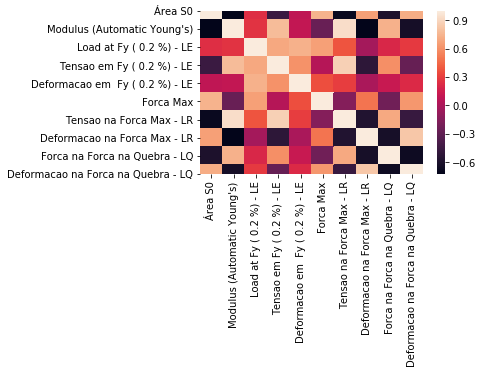

In [14]:
heatmap = sns.heatmap(dados.drop(['Plano','Plano ID'],axis=1).corr())
fig = heatmap.get_figure()
fig.set_size_inches(5, 3)
fig.savefig('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Visualização de dados/Heatmap.png')

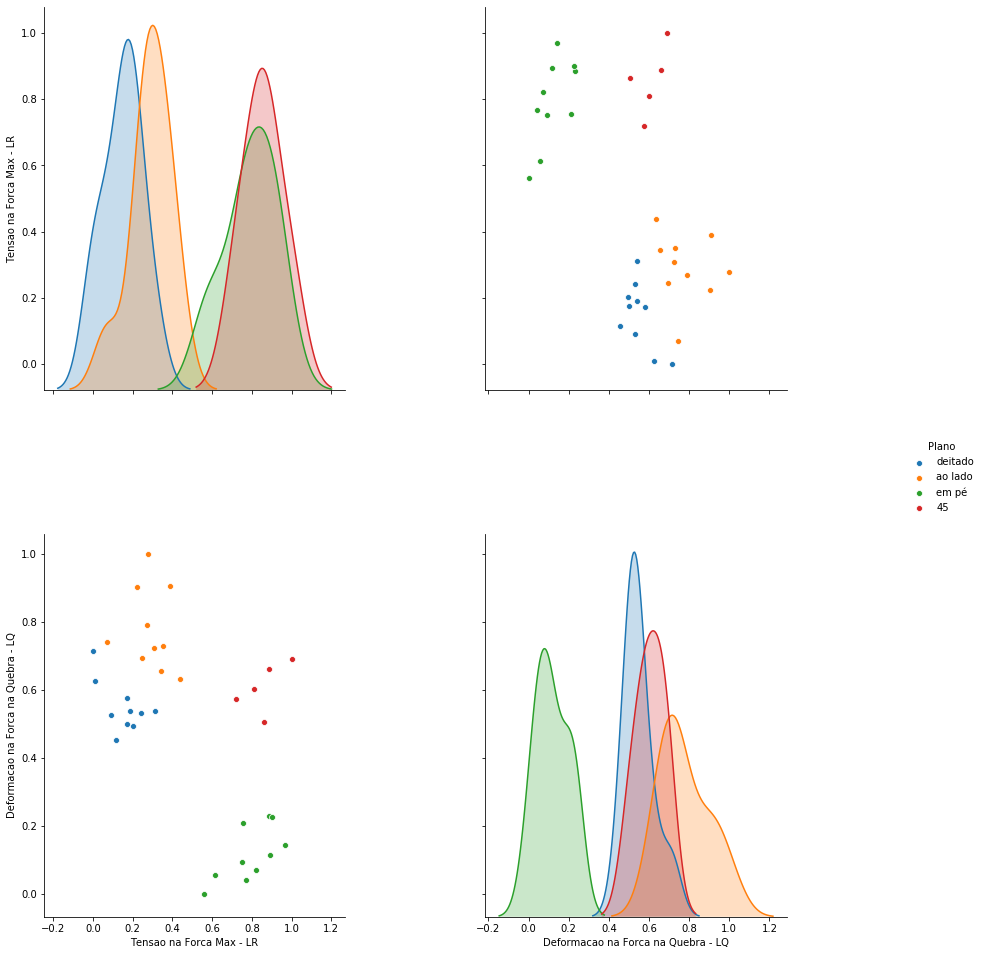

In [23]:
sns.pairplot(dados[['Plano','Tensao na Forca Max - LR','Deformacao na Forca na Quebra - LQ']],hue='Plano').fig.set_size_inches(15,15)

## Pairplot

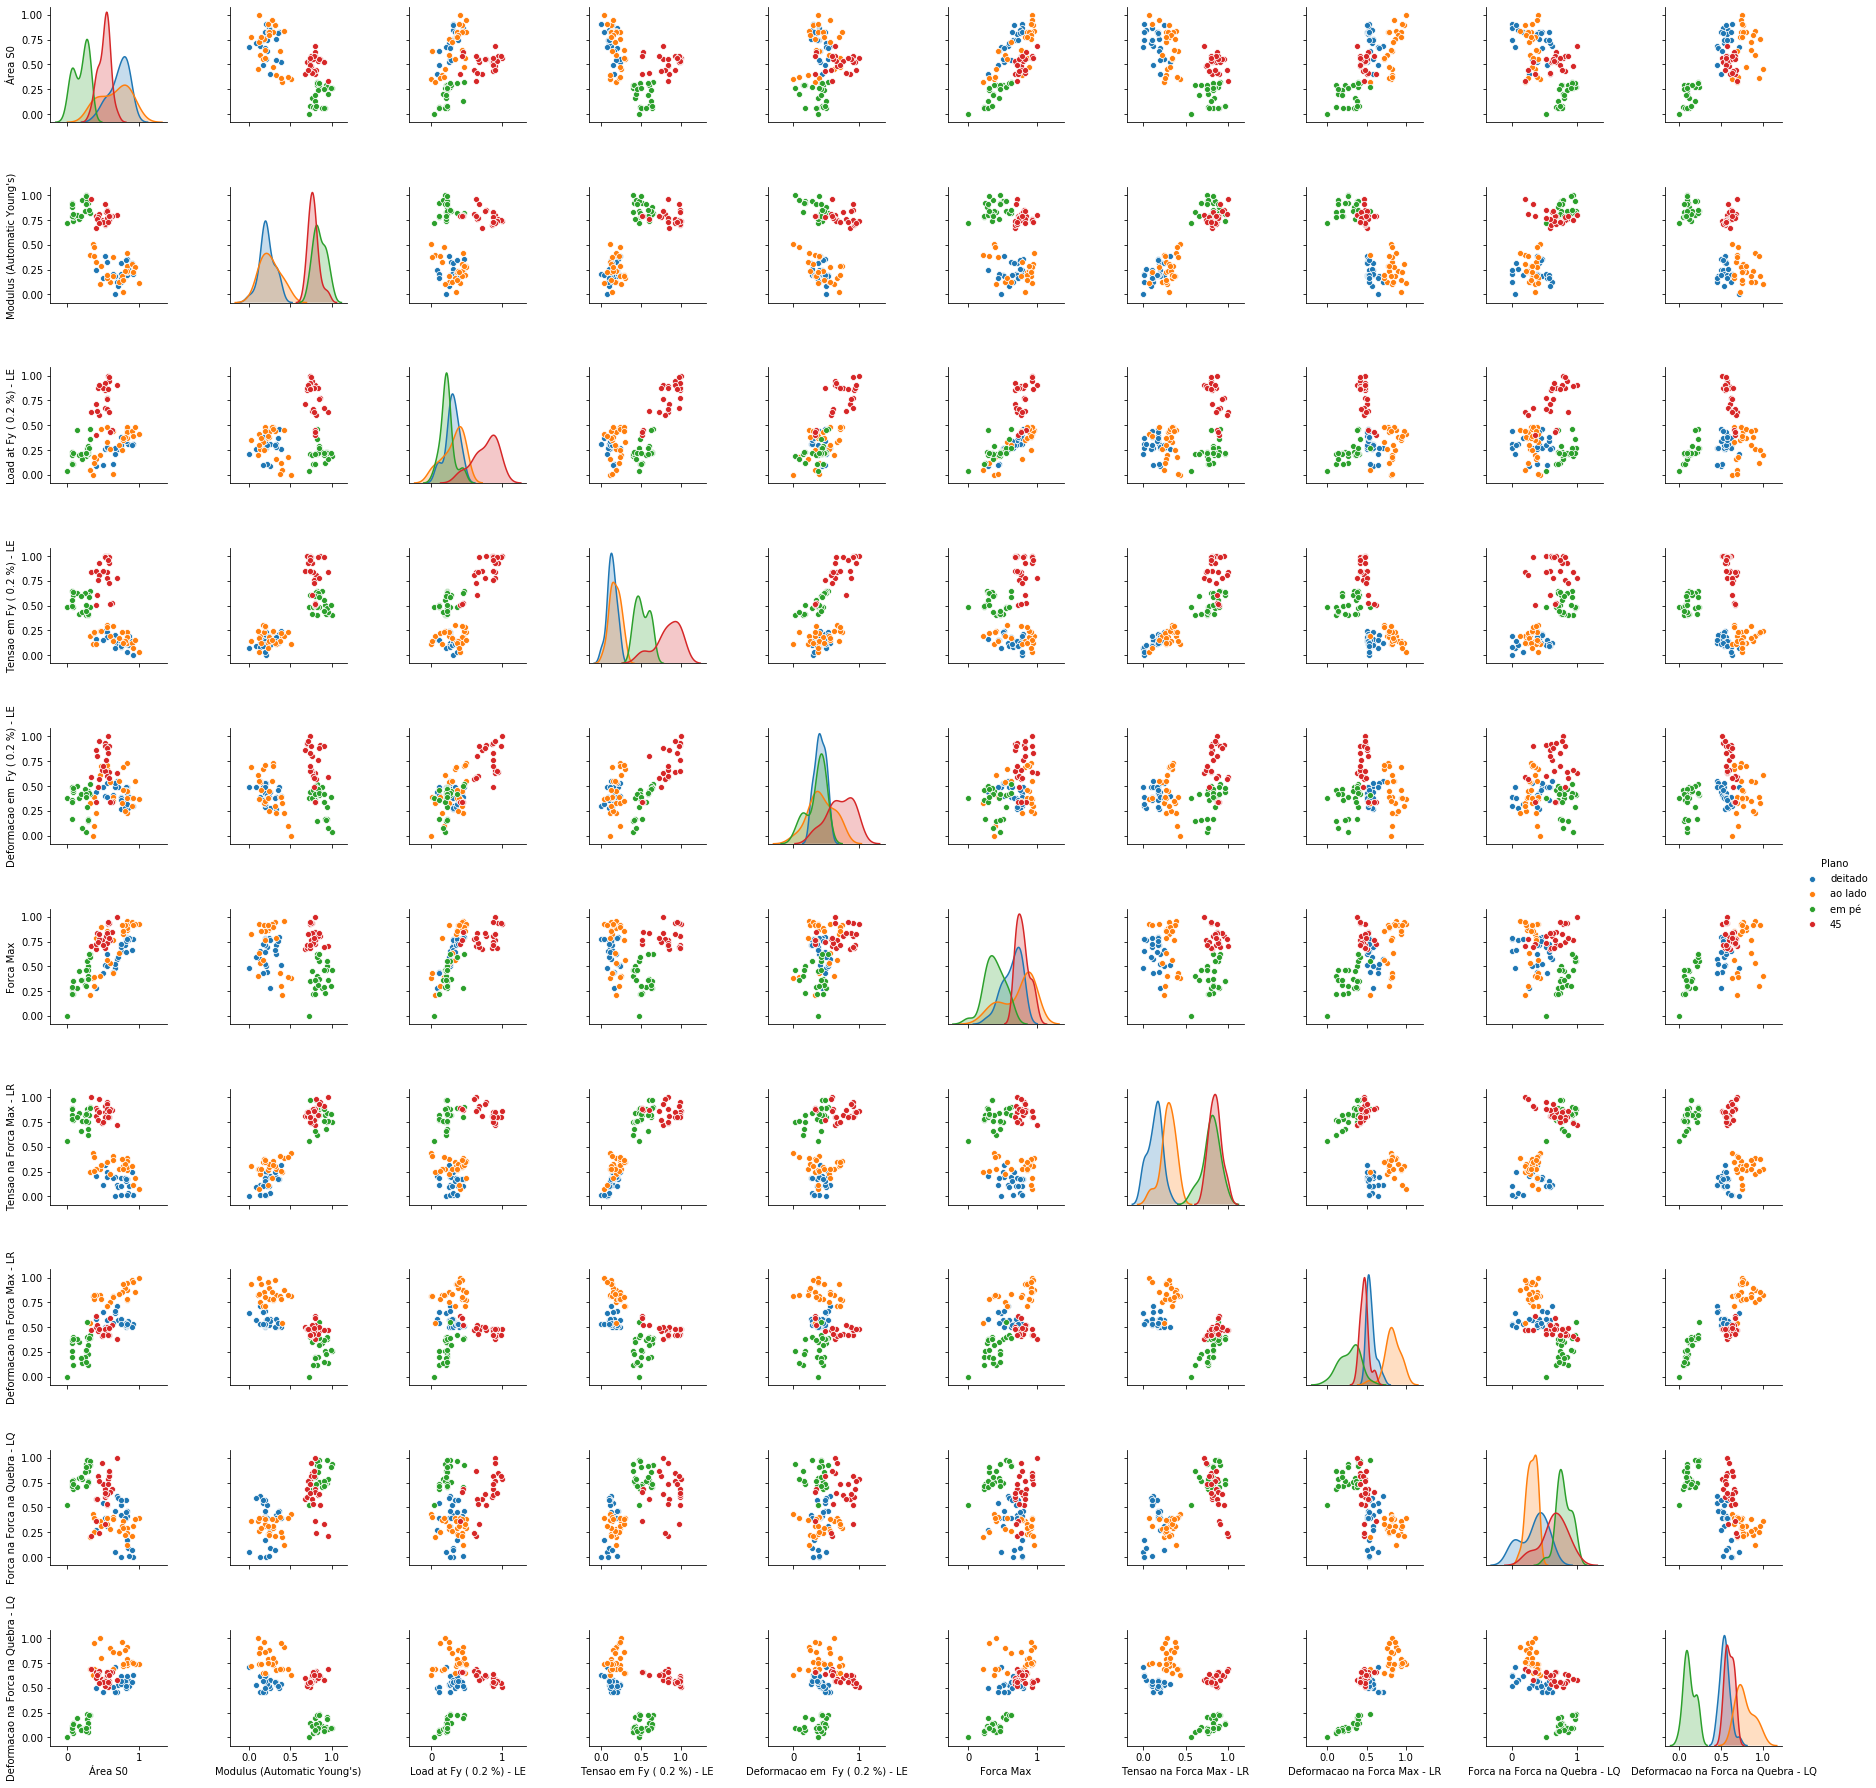

In [19]:
pairplot = sns.pairplot(dados.drop(['Plano ID'],axis=1),hue='Plano')
fig = pairplot.fig
fig.savefig('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Visualização de dados/Pairplot.png')

## Boxplot

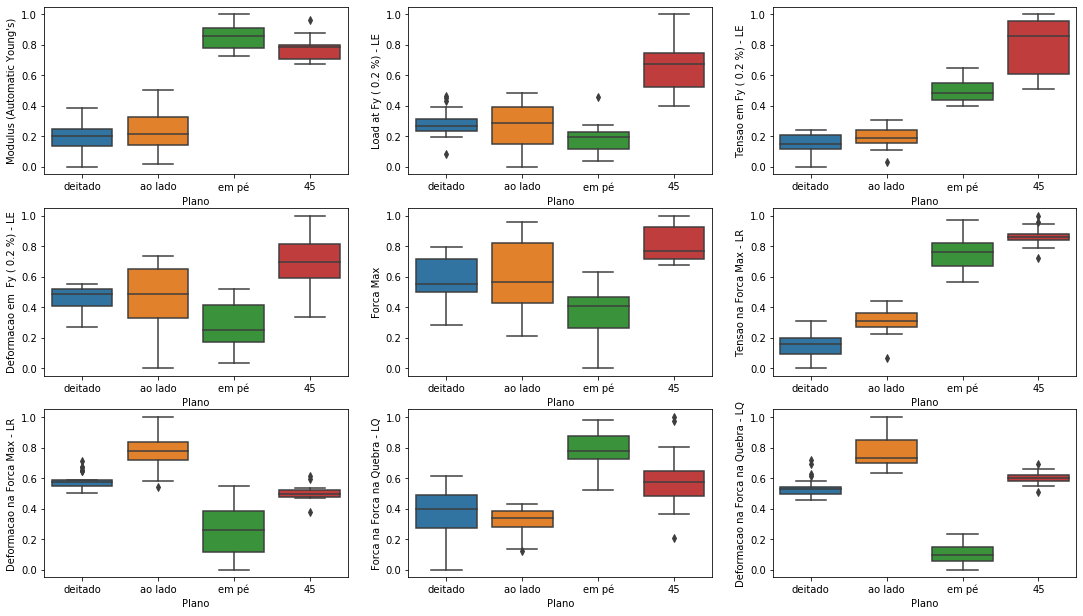

In [339]:
fig,axs=plt.subplots(3,3)
fig.set_size_inches(18.5, 10.5)
cols= dados.columns[1:10]
for i in range(3):
    for j in range(3):
        sns.boxplot(x='Plano',y=cols[i*3+j],data=dados,ax=axs[i][j])
fig.savefig('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Visualização de dados/Boxplot.png')

# Exportar dados normalizados e Balanceados 

In [340]:
dados.to_csv('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Dados/Dados tratados.csv',index=False)